#  Load and Understand the Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/content/netflix.csv'
netflix_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(netflix_data.head())
print("\n")
# Display data types and non-null counts
print(netflix_data.info())


# Seeing the number of missing values in the code:
missing_values = netflix_data.isnull().sum().sum()
print("Total missing values in the dataset:",missing_values)
print("\n")
# Display basic statistics
netflix_data.describe()


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Visualize Missing Values

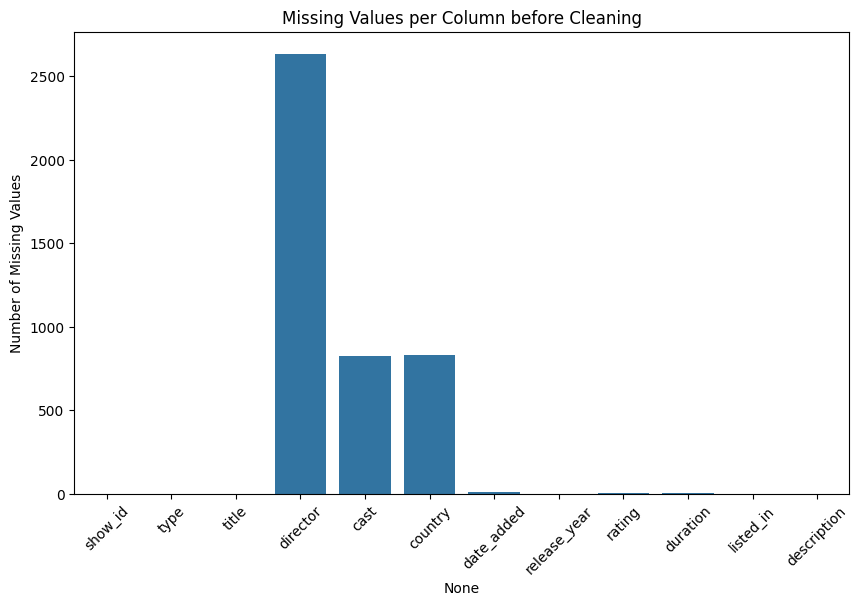

In [ ]:
# Check for missing values
missing_values = netflix_data.isnull().sum()

# Visualize the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values per Column before Cleaning')
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.show()


## Filling missing values with mean or median

# Handling the 'duration' Column

In [ ]:
# Clean 'duration' column
netflix_data['duration'] = netflix_data['duration'].fillna('0 min')
netflix_data['duration'] = netflix_data['duration'].str.replace(' min', '').str.replace(' Season', 's').str.replace(' Seasons', 's')

# Separate 'duration' into 'duration_minutes' and 'duration_seasons'
netflix_data['duration_minutes'] = netflix_data['duration'].apply(lambda x: int(x) if 's' not in x else 0)
netflix_data['duration_seasons'] = netflix_data['duration'].apply(lambda x: int(x.replace('s', '')) if 's' in x else 0)

# Drop the original 'duration' column
netflix_data.drop(columns=['duration'], inplace=True)


# Dealing with missing values

In [ ]:
numerical_cols = ['duration_minutes', 'duration_seasons']

for col in numerical_cols:
    if col in netflix_data.columns:
        netflix_data[col].fillna(netflix_data[col].median(), inplace=True)
    else:
        print(f"Column '{col}' not found in the dataset.")

# Check if there are any remaining missing values
print(netflix_data.isnull().sum())

Column 'duration_minutes' not found in the dataset.
Column 'duration_seasons' not found in the dataset.
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


## filling missing value with unknown

In [ ]:
categorical_cols = ['director', 'cast', 'country', 'rating']
netflix_data[categorical_cols] = netflix_data[categorical_cols].fillna('Unknown')

# Check if there are any remaining missing values
print(netflix_data.isnull().sum())


show_id              0
type                 0
title                0
director             0
cast                 0
country              0
date_added          10
release_year         0
rating               0
listed_in            0
description          0
duration_minutes     0
duration_seasons     0
dtype: int64


## Dropping values

In [ ]:
# Drop rows with any missing values
netflix_data.dropna(inplace=True)

# Check if there are any remaining missing values
print(netflix_data.isnull().sum())


show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
listed_in           0
description         0
duration_minutes    0
duration_seasons    0
dtype: int64


# visualizing after data cleaning

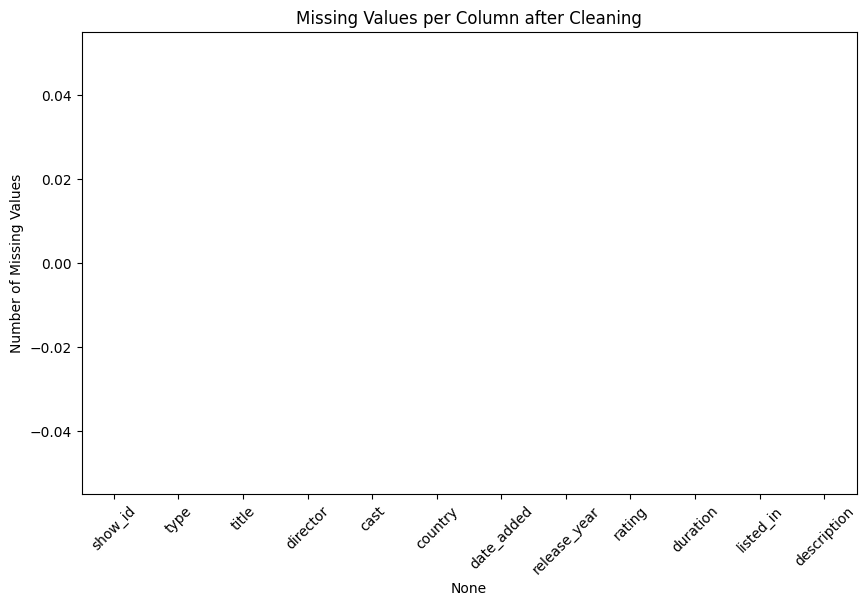

In [ ]:
# Check for missing values
missing_values = netflix_data.isnull().sum()

# Visualize the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values per Column after Cleaning')
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.show()


# Distribution of Categorical Variables

<ipython-input-3-a361781ca42e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_data, x='type', palette='viridis')


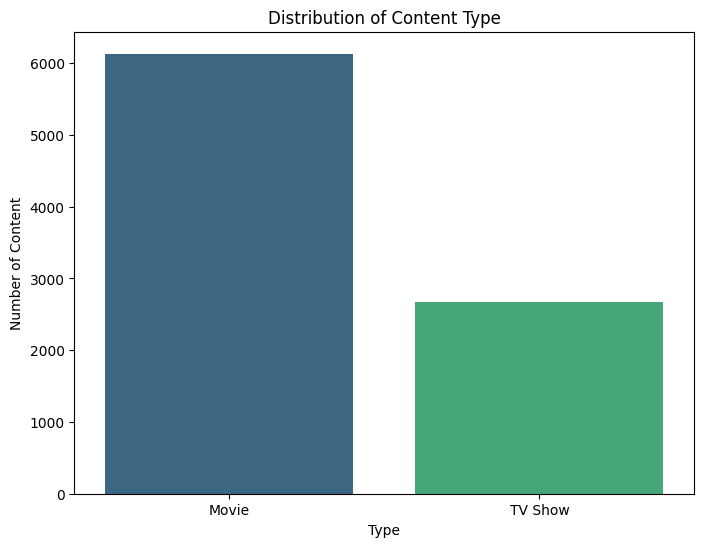

<ipython-input-3-a361781ca42e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_data, x='rating', palette='coolwarm', order=netflix_data['rating'].value_counts().index)


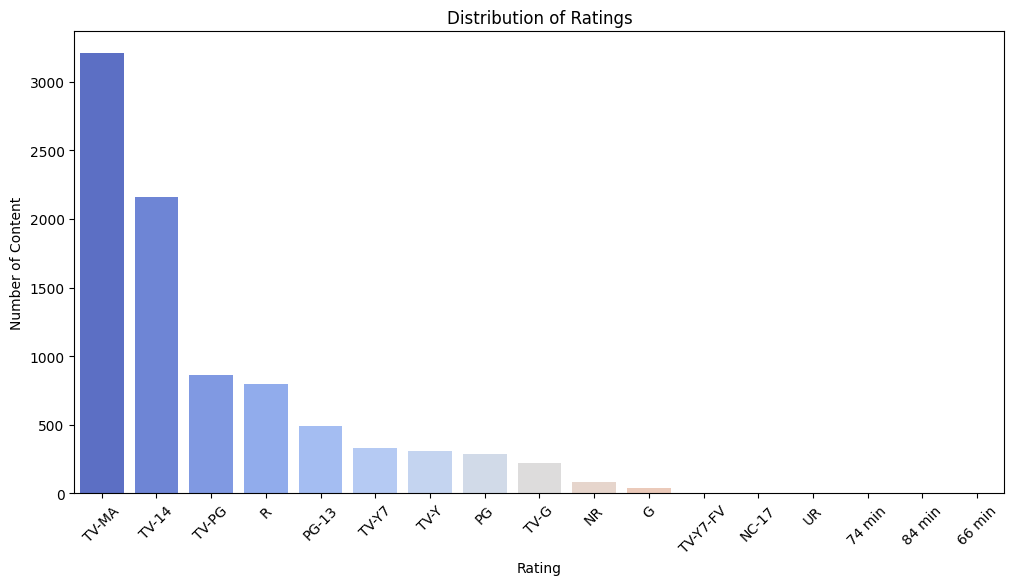

In [ ]:
# Distribution of content type
plt.figure(figsize=(8, 6))
sns.countplot(data=netflix_data, x='type', palette='viridis')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Number of Content')
plt.show()

# Distribution of ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=netflix_data, x='rating', palette='coolwarm', order=netflix_data['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Content')
plt.xticks(rotation=45)
plt.show()
# Distribution of release year
plt.figure(figsize=(12, 6))
sns.histplot(netflix_data['release_year'], bins=30, kde=True, color='purple')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


# Distribution of Numerical Variables

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


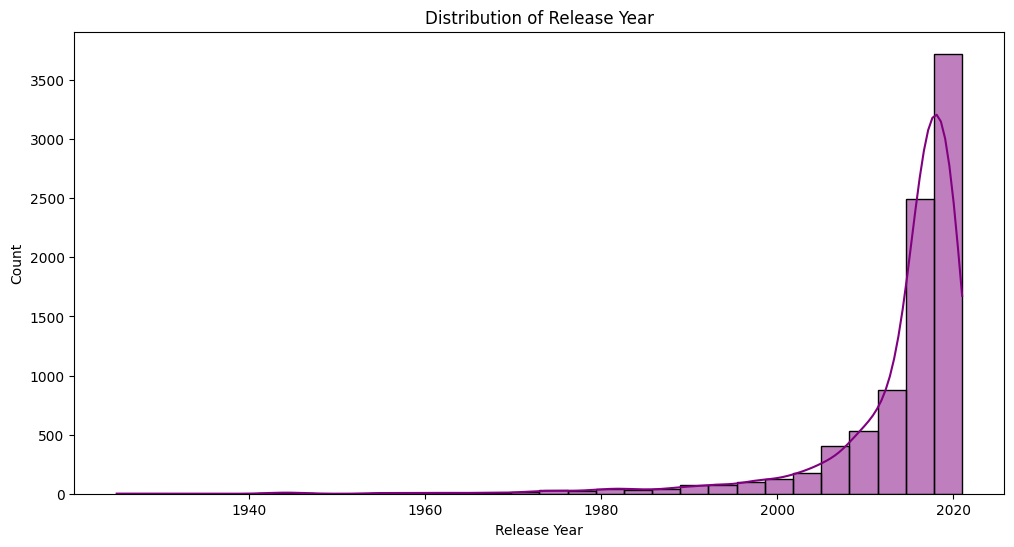

In [ ]:
  # Distribution of release year
  plt.figure(figsize=(12, 6))
  sns.histplot(netflix_data['release_year'], bins=30, kde=True, color='purple')
  plt.title('Distribution of Release Year')
  plt.xlabel('Release Year')
  plt.ylabel('Count')
  plt.show()


# Descriptive Statistics for Numerical Variables

In [ ]:
# Summary statistics for numerical variables
print(netflix_data[['release_year', 'duration_minutes', 'duration_seasons']].describe())

# Additional statistics for numerical variables
def additional_stats(df):
    stats = df.agg(['mean', 'median', 'std', 'var', 'skew', 'kurt']).T
    stats['iqr'] = df.quantile(0.75) - df.quantile(0.25)
    return stats

print(additional_stats(netflix_data[['release_year', 'duration_minutes', 'duration_seasons']]))


       release_year  duration_minutes  duration_seasons
count   8807.000000       8807.000000       8807.000000
mean    2014.180198         69.286817          0.536278
std        8.819312         51.534755          1.191620
min     1925.000000          0.000000          0.000000
25%     2013.000000          0.000000          0.000000
50%     2017.000000         88.000000          0.000000
75%     2019.000000        106.000000          1.000000
max     2021.000000        312.000000         17.000000
                         mean  median        std          var      skew  \
release_year      2014.180198  2017.0   8.819312    77.780266 -3.446565   
duration_minutes    69.286817    88.0  51.534755  2655.830967 -0.205050   
duration_seasons     0.536278     0.0   1.191620     1.419959  4.359961   

                       kurt    iqr  
release_year      16.232226    6.0  
duration_minutes  -1.098928  106.0  
duration_seasons  28.893142    1.0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Frequency Tables for Categorical Variables

In [ ]:
# Frequency tables for categorical variables
categorical_cols = ['type', 'rating', 'director', 'cast', 'country']

for col in categorical_cols:
    print(f"Frequency table for {col}:")
    print(netflix_data[col].value_counts())
    print()


Frequency table for type:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Frequency table for rating:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Frequency table for director:
director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

Frequency table for cast:
cast
David Attenborough                       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Box Plots for Outlier Detection

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


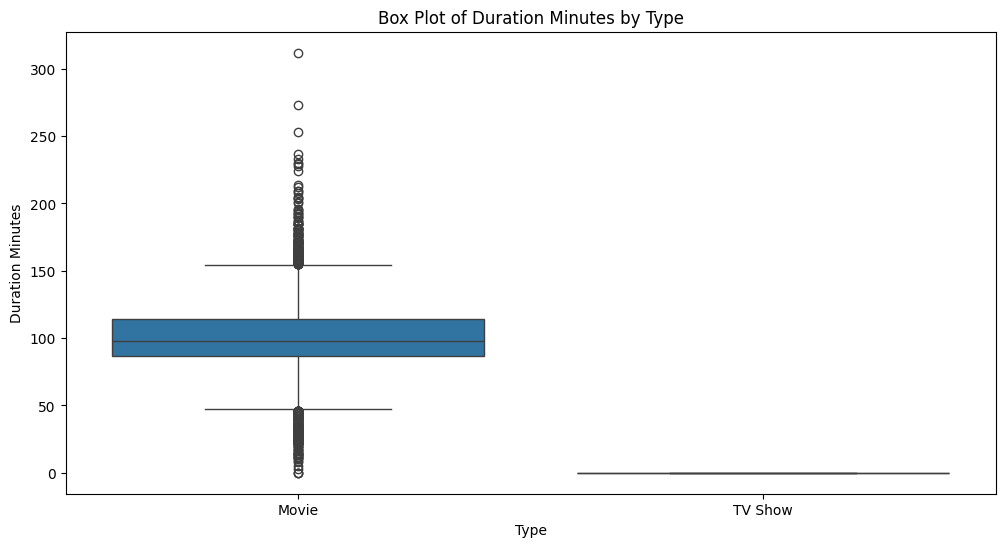

In [ ]:
# Box plot for duration in minutes
plt.figure(figsize=(12, 6))
sns.boxplot(data=netflix_data, x='type', y='duration_minutes')
plt.title('Box Plot of Duration Minutes by Type')
plt.xlabel('Type')
plt.ylabel('Duration Minutes')
plt.show()


# Clustering

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5972897374941339


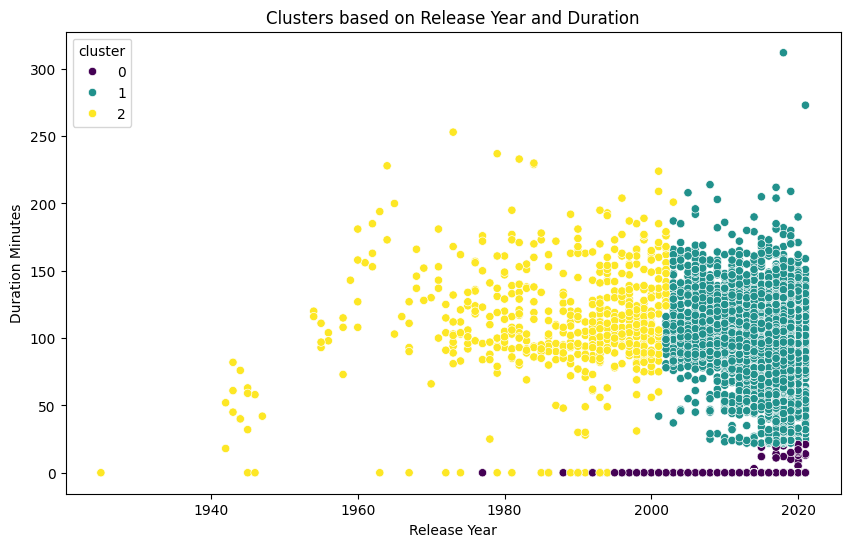

Cluster Centers:
   release_year  duration_minutes  duration_seasons  cluster
0   2016.930855          0.175093      1.742751e+00        1
1   2015.637663         98.365955     -1.221245e-15        2
2   1987.938879        112.005093      5.942275e-02        3


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Select numerical columns for clustering
numeric_cols = ['release_year', 'duration_minutes', 'duration_seasons']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(netflix_data[numeric_cols])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
netflix_data['cluster'] = kmeans.fit_predict(scaled_data)

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_data, netflix_data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=netflix_data, x='release_year', y='duration_minutes', hue='cluster', palette='viridis')
plt.title('Clusters based on Release Year and Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration Minutes')
plt.show()

# Cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numeric_cols)
cluster_centers_df['cluster'] = range(1, len(cluster_centers) + 1)
print("Cluster Centers:")
print(cluster_centers_df)


# Association Rule Mining

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare the data for association rule mining
# For simplicity, we'll create a binary matrix for selected columns
binary_matrix = pd.get_dummies(netflix_data[['type', 'rating']])

# Apply the Apriori algorithm
frequent_itemsets = apriori(binary_matrix, min_support=0.1, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


      antecedents   consequents   support  confidence      lift
0  (rating_TV-14)  (type_Movie)  0.162030    0.660648  0.949002
1  (rating_TV-MA)  (type_Movie)  0.234132    0.642969  0.923605


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# analysing the description column with word cloud

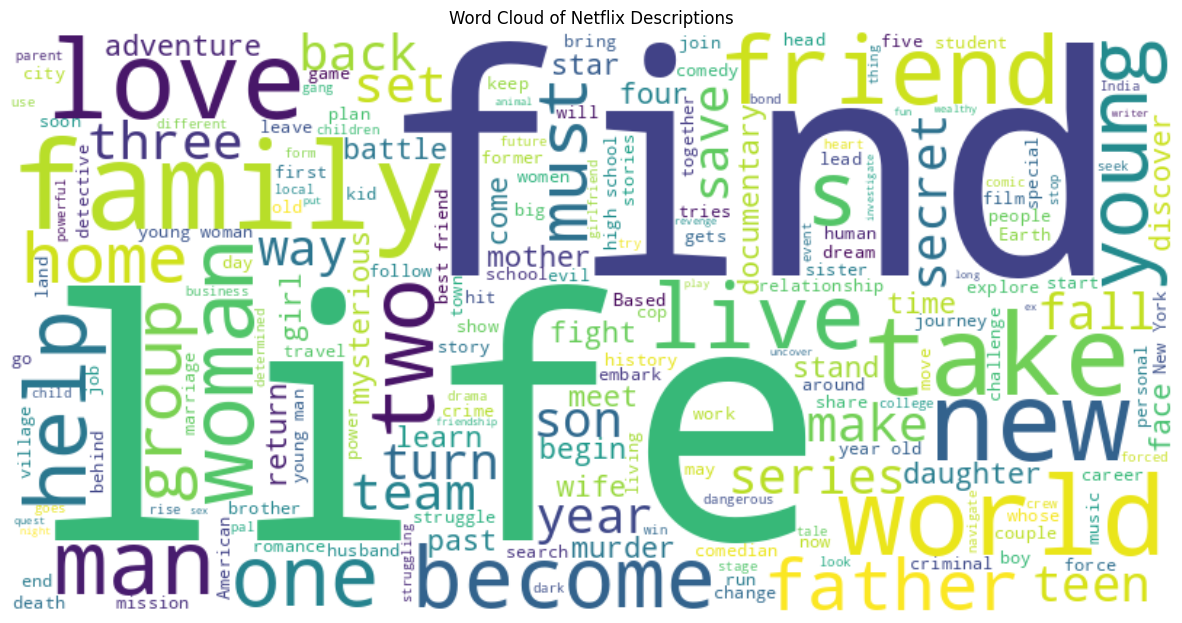

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions into a single string
text = ' '.join(netflix_data['description'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Descriptions')
plt.show()